In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import io
from scipy import misc
import pydotplus
import collections
from sklearn import tree
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# 1. Write a small paragraph describing the dataset that you choose, its features, number of instances, nature of the data, and anything else that you found to be interesting.

For this assignment I had to find a new dataset that is binary. When searching through datasets I found a banknote dataset that used values from images to determine if a banknote is real or fake:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Data Set Information:
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

Features:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

Number of Instances: 1372




In [4]:
bank_data = pd.read_csv(
'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt',
                           names = ["variance", "skewness", "curtosis", "entropy", "class"], sep= ',', header= None)

# 2. Provide a brief analysis of the dataset you downloaded. Does it have missing data? Are the features numeric/discrete/categorical? Create some histograms/boxplots/other visualizations to illustrate the content o the dataset.

There is no missing data in this dataset, below we can see the the feature datatypes and some of the rows in the dataset.

In [6]:
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


'Class' is a discrete, binary integer of 0 or 1 and all other numeric features are represented as floats.

In [9]:
bank_data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Below we can see all features plotted against each other using the pairplot function of seaborn.

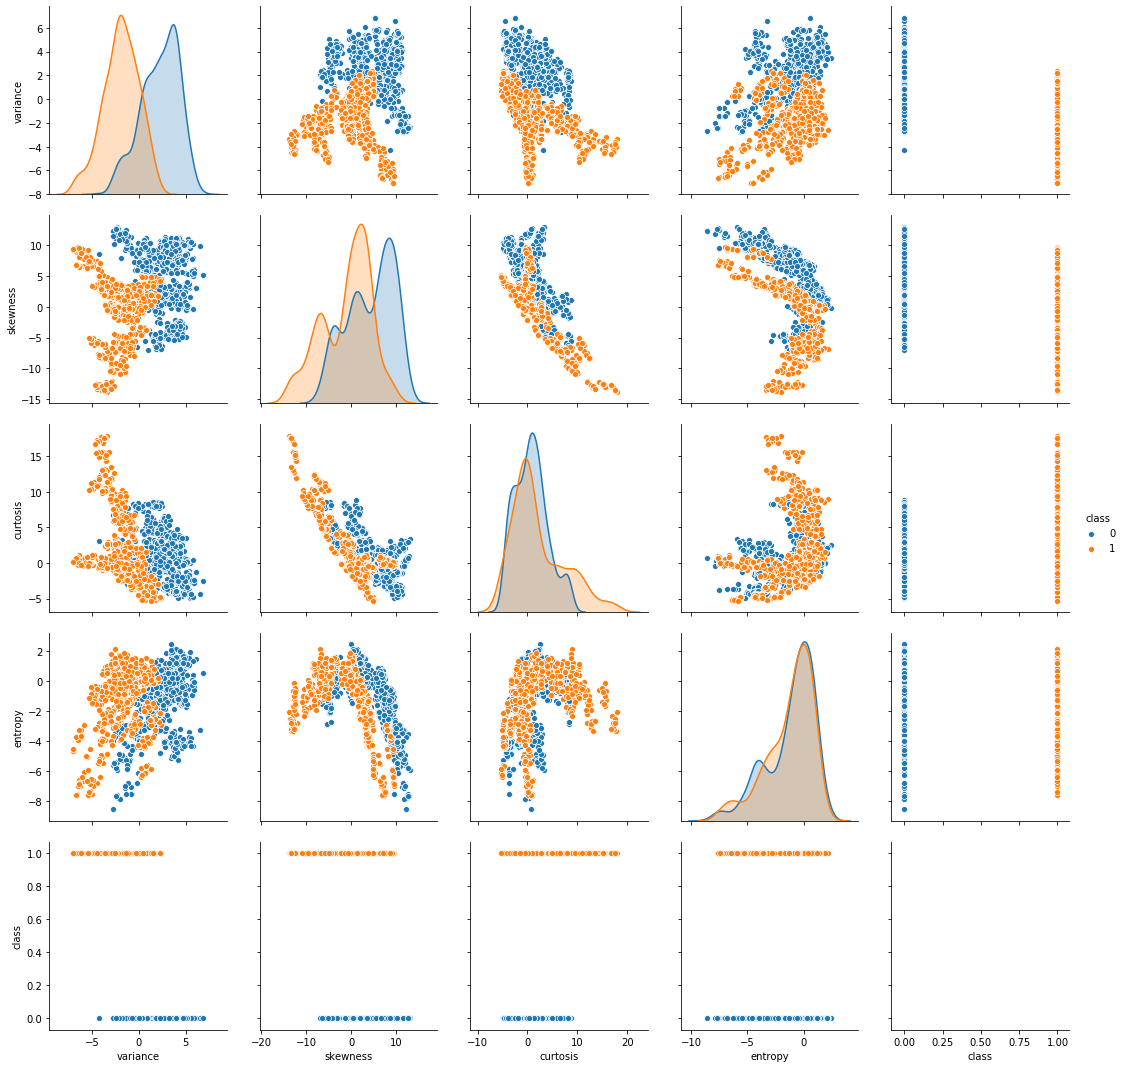

In [12]:
import warnings
sns.pairplot(bank_data, hue="class", size=3)
warnings.filterwarnings("ignore")

In [31]:
# Some box plots

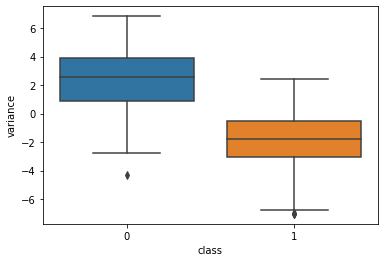

In [15]:
sns.boxplot(x="class", y="variance", data=bank_data)

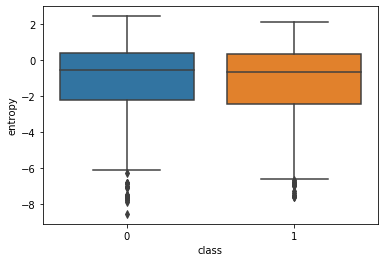

In [16]:
sns.boxplot(x="class", y="entropy", data=bank_data)

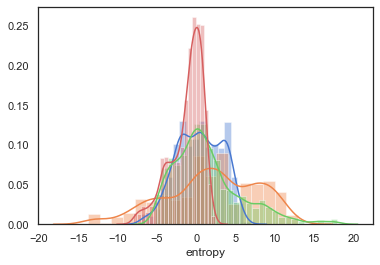

In [27]:
# Histograms of numeric features and then the binary feature, 'class'
sns.distplot(bank_data['variance'].astype(float))
sns.distplot(bank_data['skewness'].astype(float))
sns.distplot(bank_data['curtosis'].astype(float))
sns.distplot(bank_data['entropy'].astype(float))
#sns.distplot(bank_data['class'].astype(float))

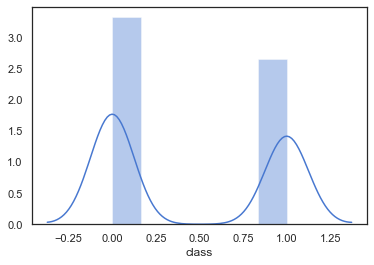

In [29]:
sns.distplot(bank_data['class'].astype(float))

# 3. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can be used to generate predicions for your data. A reference to how you can do that can be found on scikit-learn.

In [33]:
# Split, train, create trees, and fit model for both gini and entropy
X = bank_data.values[:, 0:4]
Y = bank_data.values[:,4]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clf_gini = clf_gini.fit(X_train, y_train)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
clf_entropy = clf_entropy.fit(X_train, y_train)

In [34]:
# Make predictions:
y_pred = clf_gini.predict(X_test)
y_prob = clf_gini.predict_proba(X_test)
y_pred_en = clf_entropy.predict(X_test)
y_prob_en = clf_entropy.predict_proba(X_test)

# 4. The link above explains how you can generate a visual output for the tree you just trained. Use that code snippet to create a visualization of your tree.

In [37]:
data_feature_names = ["variance", "skewness", "curtosis", "entropy"]
dot_data = tree.export_graphviz(clf_gini,
                                feature_names=data_feature_names,
                                class_names = "class",
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_gini_8B.png')

True

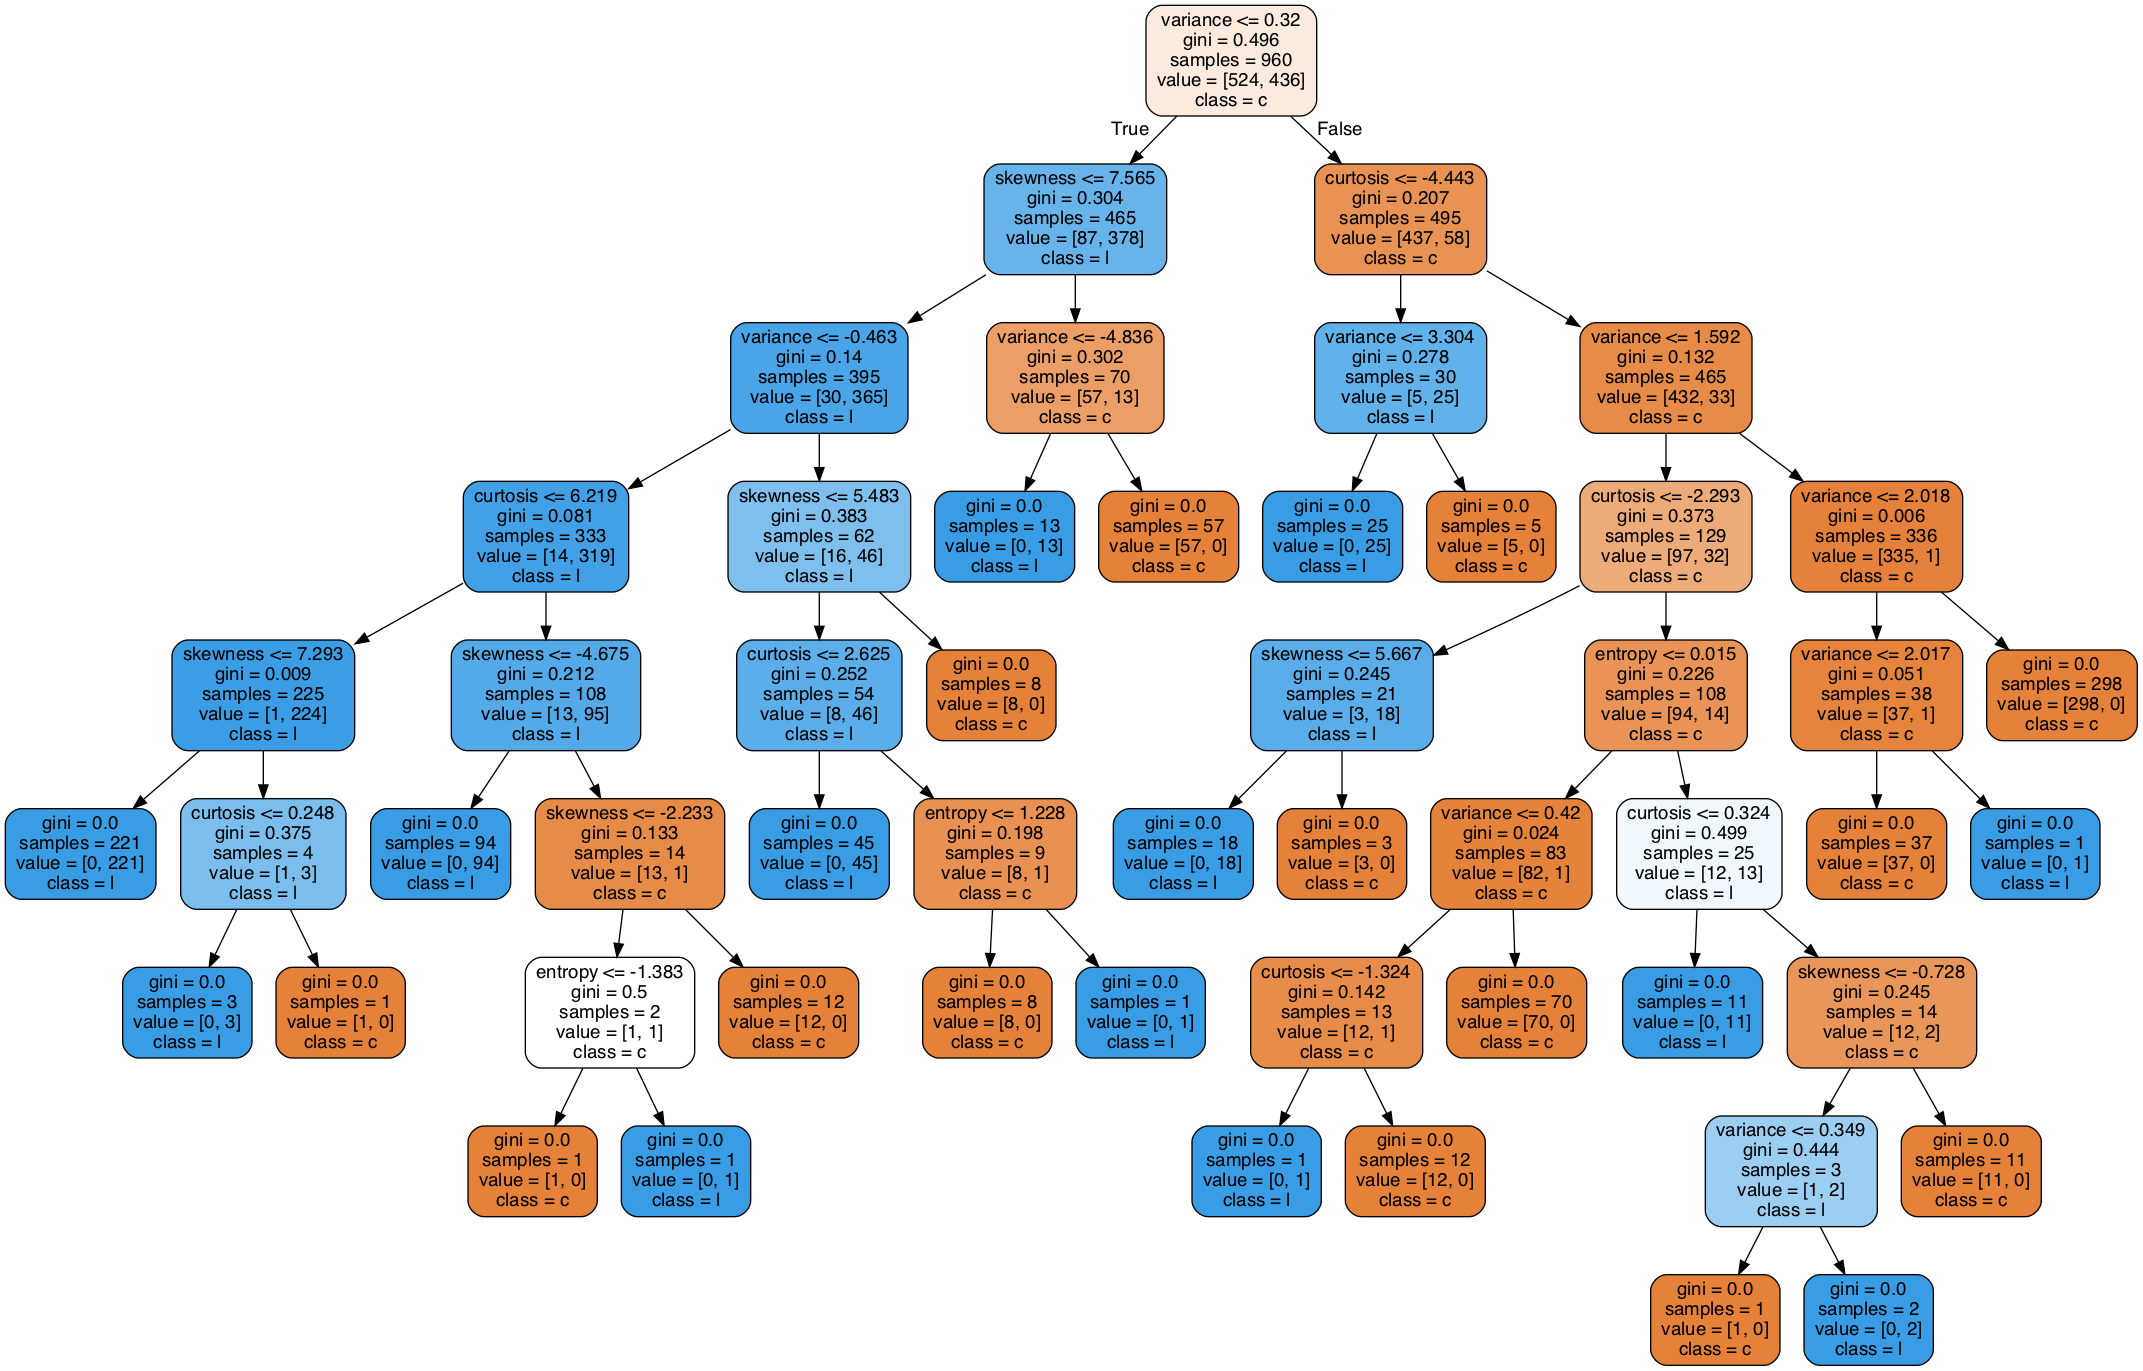

In [38]:
from IPython.display import Image
Image("tree_gini_8B.png")

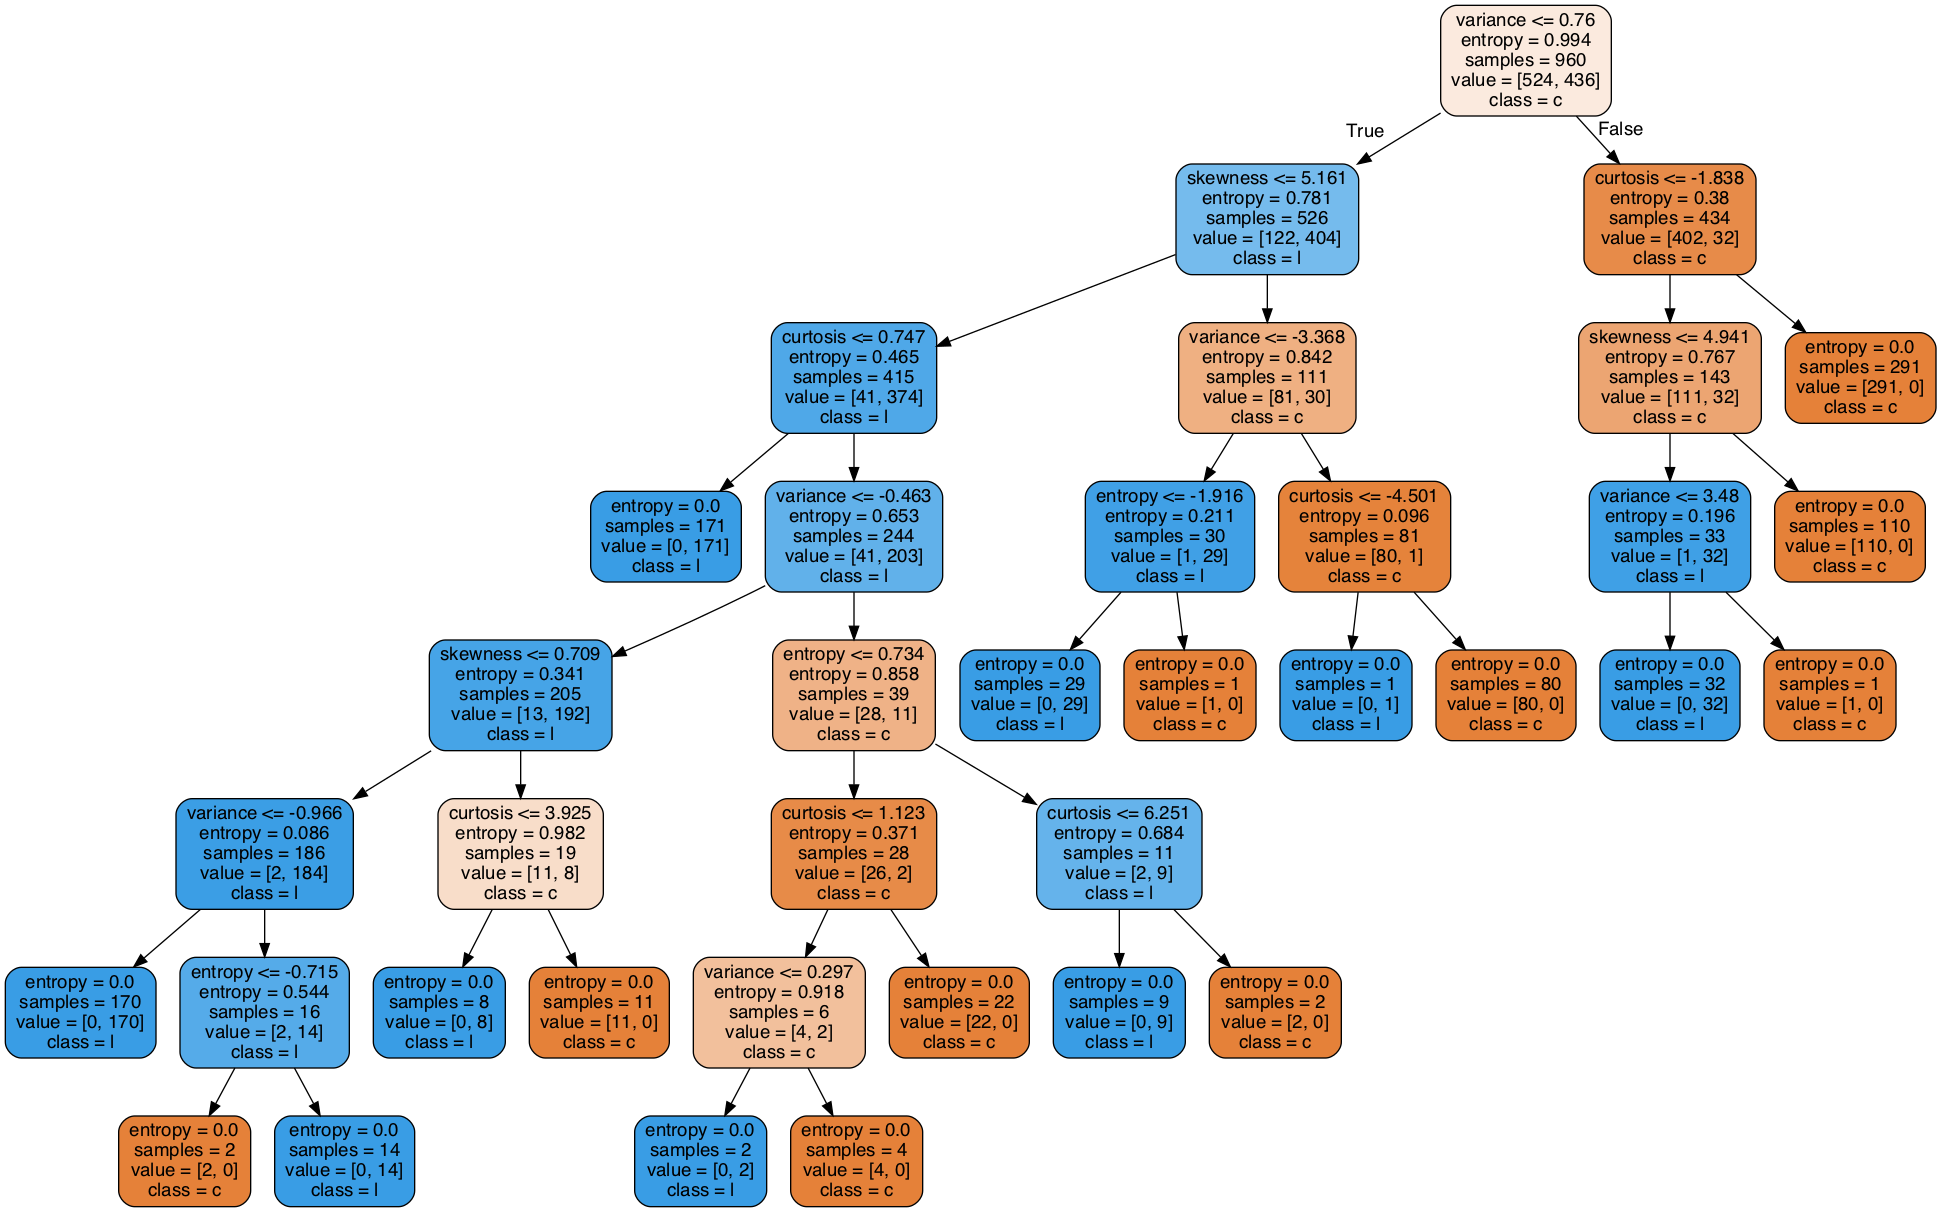

In [39]:
data_feature_names = ["variance", "skewness", "curtosis", "entropy"]
dot_data = tree.export_graphviz(clf_entropy,
                                feature_names=data_feature_names,
                                class_names = "class",
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree_entropy_8B.png')
Image("tree_entropy_8B.png")

# 5. Create a new instance with your choice of values for each of the features. Use your trained model to generate a prediction for it. Using your tree illustration as a reference, write a short paragraph describing how your model went about generating that specific prediction. Does it make sense to you? Can it be improved? Go back and play with the parameters that you used for training your tree and see if you can obtain better results.

In [42]:
clf_gini.predict([[1, 1, 2, 2]])

array([0.])

Path down tree: FALSE -> FALSE -> FALSE -> TRUE -> TRUE 
class = 0

In [43]:
clf_entropy.predict([[1, 1, 2, 2]])

array([0.])

Path down tree: FALSE -> FALSE class = 0

In [72]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 5),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_*100))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 6}
Best score is 97.70833333333333


# 8B :Retrain your model using the above suggestions (be sure to split your data into train/test where appropriate), and deliver a notebook containing a detailed evaluation report listing the metrics listed below, along with your commentary to each:

1. The accuracy of your model on the test data
2. The precision and recall values
3. A classification report (scikit-learn has a function that can create this for you)
4. The confusion matrix for this experiment
5. An ROC curve
6. A Precision/Recall curve

In [64]:
# Try a different method of train test split and fit
train, test= train_test_split(bank_data,train_size=0.7)
clf = tree.DecisionTreeClassifier(random_state=0)
train_features = train[["variance", "skewness", "curtosis", "entropy"]]
train_target = train[["class"]]
test_features = test[["variance", "skewness", "curtosis", "entropy"]]
test_target = test[["class"]]
clf = clf.fit(train_features, train_target)

In [65]:
train_features[:5]

,variance,skewness,curtosis,entropy
248,0.3798,0.7098,0.757200,-0.44440
51,5.2620,3.9834,-1.557200,1.01030
439,4.7285,2.1065,-0.283050,1.56250
339,1.8205,6.7562,0.009991,0.39481
1139,-1.5228,-6.4789,5.756800,0.87325


In [66]:
train_target[:5]

,class
248,0
51,0
439,0
339,0
1139,1


In [73]:
y_pred = clf.predict(test_features)
y_pred = np.array(y_pred)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [74]:
y_pred_prob = clf.predict_proba(test_features)
y_pred_prob_class1 = y_pred_prob[:, 1]
y_pred_prob_class1

array([1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 1.

In [75]:
#1.The accuracy of your model on the test data
from sklearn.metrics import accuracy_score
accuracy_score(test_target, y_pred)

0.9805825242718447

We can see that by using the 'class' as our feature to target we can gain ~98% accuracy using this model, with a 70/30 train/test split. 

In [76]:
#2. The precision and recall values
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(test_target, y_pred, average='binary')

(0.9887640449438202, 0.967032967032967, 0.9777777777777779, None)

The precision is the ratio of TP/(TP+FP) where TP = true positives and FP = false positives. Here we see that the precision score is 98.9% whcih means that 98.9% of all predicitons are true positive. A recall of 96.7% means that true positives occur 96.7% of the time. An f-score close to 1 is the best and we can see at 0.98 we are very close so this is good. 

In [77]:
#3.A classification report (scikit-learn has a function that can create this for you)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(test_target, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.99      0.98       230
     class 1       0.99      0.97      0.98       182

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



Support for class = '1' is about 79% of that of class = '0' with a very high sccuracy of 98%

(228, 2, 6, 176)

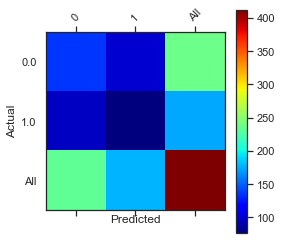

In [91]:
#4.The confusion matrix for this experiment
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_target, y_pred).ravel()

y_actual = pd.Series(y_test, name='Actual')
y_predict = pd.Series(y_pred, name='Predicted')
confusion = pd.crosstab(y_actual, y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)

def plot_confusion_matrix(confusion, title='Confusion matrix', cmap='jet'):
    plt.matshow(confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(confusion.columns))
    plt.xticks(tick_marks, confusion.columns, rotation=45)
    plt.yticks(tick_marks, confusion.index)
    #plt.tight_layout()
    plt.ylabel(confusion.index.name)
    plt.xlabel(confusion.columns.name)

plot_confusion_matrix(confusion)
tn, fp, fn, tp

There are only 2 false positives and 6 false negatives which is very good and matches up with the 98% accuracy of the predicted set.  

[0.         0.00869565 1.        ]
[0.         0.96703297 1.        ]


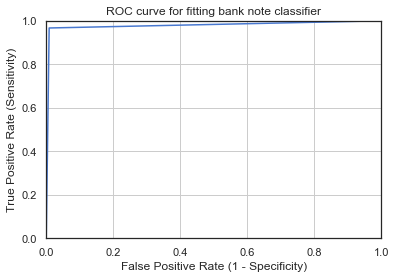

In [85]:
#5.An ROC curve
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds1 = roc_curve(test_target, y_pred_prob_class1)
plt.plot(fpr1, tpr1)
print(fpr1)
print(tpr1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for fitting bank note classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [86]:
from sklearn import metrics
metrics.auc(fpr1, tpr1)

0.9791686574295271

An ROC curve with an immediate sharp increase like this means that there is a very high true positive rate. The AUC is 0.98 and we can see the TP rate shoot up at 0.967 with an extremely low FP rate of 0.00087

[0.44174757 0.98876404 1.        ]
[1.         0.96703297 0.        ]


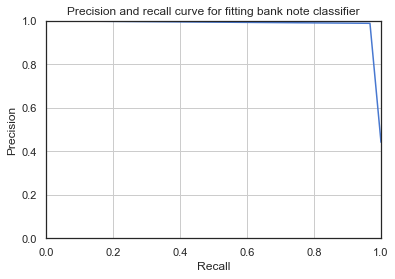

In [84]:
#6.A Precision/Recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(test_target, y_pred_prob_class1)
plt.plot(recall, precision)
print(precision)
print(recall)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision and recall curve for fitting bank note classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

We can again see a high AUC which means there is both high precision and high recall, yielding low false positives and low false positives, respectively.